___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://media.geeksforgeeks.org/wp-content/uploads/Dimensionality_Reduction_2.jpg" width="350px" height="180px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
- <Strong> Paula Daniela Cárdenas Gallardo </Strong>
- <Strong> Año </Strong>: 2021
- <Strong> Email: </Strong>  <font color="blue"> `p.daniela.cardenas@gmail.com` </font>
___

<p style="text-align:right;"> Imagen recuperada de: https://media.geeksforgeeks.org/wp-content/uploads/Dimensionality_Reduction_2.jpg</p>


### <font color= #2E9AFE> Tema: Reducción de dimensionalidad</font>

La selección de características es diferente a la reducción de dimensionalidad. Ambos métodos buscan reducir la cantidad de atributos en el conjunto de datos, pero un método de reducción de dimensionalidad lo hace creando nuevas combinaciones de atributos, donde los métodos de selección de características incluyen y excluyen atributos presentes en los datos sin cambiarlos.

Ejemplos de métodos de reducción de dimensionalidad incluyen: Análisis de componentes principales y Descomposición de valores singulares.

### Principant Component Analysis 

El PCA usa álgebra lineal para transformar el conjunto de datos en una forma comprimida.

Generalmente, se denomina como técnica de reducción de datos. Una propiedad es que puede elegir el número de dimensiones o componentes principales en el resultado transformado.

#### NIPALS (Nonlinear Iterative partial Least Squares)

Este algoritmo no calcula todos los componentes principales a la vez. Se calcula el componente $t_1$ y $p_1$, y la información es sustraída de X, donde el residual es usado para calcular el siguiente componente principal. 





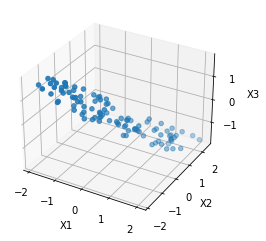

In [1]:
# Utilizar datos con target numérico
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('/Users/Daniela Cardenas/Documents/ITESO/3° Semestre/Laboratorio de Modelado de Datos/datos_PLS.txt')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.x1, data.x2, data.x3)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.show()

In [2]:
data.head()

,x1,x2,x3,y
0,-1.460212,-1.311048,1.706220,1.586637
1,-1.678907,-1.273045,1.671751,1.337210
2,-1.320366,-1.354192,1.637282,1.486914
3,-1.488963,-1.433346,1.602813,1.140033
4,-1.553299,-1.823504,1.568344,1.206637


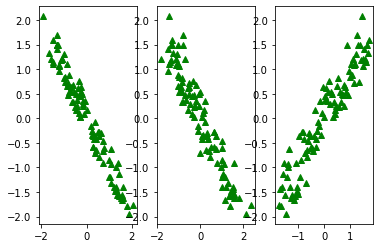

In [3]:
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(1, 3)

plt.figure()
ax = plt.subplot(gs[0, 0]) # row 0, col 0
plt.plot(data.x1, data.y, 'g^')

ax = plt.subplot(gs[0, 1]) # row 0, col 1
plt.plot(data.x2, data.y, 'g^')

ax = plt.subplot(gs[0, 2]) # row 1, span all columns
plt.plot(data.x3, data.y, 'g^')
plt.show()

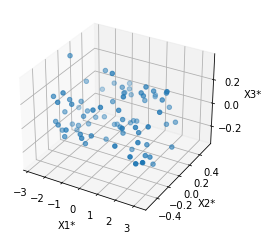

In [4]:
# Dividir en test y train dataset
from sklearn.model_selection import train_test_split
X=data.iloc[:,0:3]
Y=data.y

X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.2, random_state=44)

# PCA
pca = PCA()
pca.fit(X_train[['x1','x2','x3']]) # encontrar componentes principales
data_pca = pca.transform(X_train[['x1','x2','x3']]) # matriz T Transformada
data_pca = pd.DataFrame(data_pca,columns=['x1*','x2*','x3*']) # dataframe con las X transformadas
data_pca['y'] = y_train # agregar la variable Y


# Visualizar datos transformados 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_pca['x1*'], data_pca['x2*'], data_pca['x3*'])
ax.set_xlabel('X1*')
ax.set_ylabel('X2*')
ax.set_zlabel('X3*')
plt.show()

In [5]:
# Los datos elegidos por el PCA se parecen poco a los datos originales
data_pca.head()

,x1*,x2*,x3*,y
0,1.934313,-0.035493,-0.149504,1.586637
1,-0.480014,-0.007872,-0.222864,1.337210
2,-2.465190,-0.009906,-0.178949,1.486914
3,0.822517,0.279997,0.045085,1.140033
4,0.011807,-0.246054,0.169561,1.206637


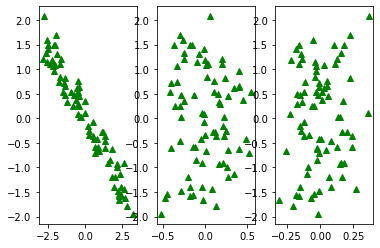

In [6]:
gs = gridspec.GridSpec(1, 3)

plt.figure()
ax = plt.subplot(gs[0, 0]) # row 0, col 0
plt.plot(data_pca['x1*'], y_train, 'g^')

ax = plt.subplot(gs[0, 1]) # row 0, col 1
plt.plot(data_pca['x2*'], y_train, 'g^')

ax = plt.subplot(gs[0, 2]) # row 1, span all columns
plt.plot(data_pca['x3*'], y_train, 'g^')
plt.show()

In [7]:
# ¿Cuáles son los componentes más importantes?
pca.explained_variance_ratio_

array([0.96982849, 0.02310548, 0.00706602])

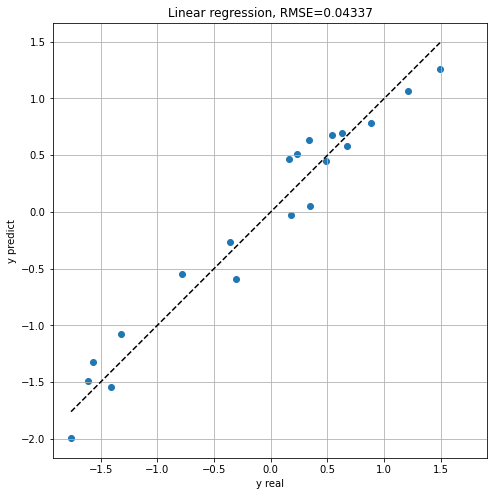

In [8]:
# Aplicar la regresión lineal con datos originales
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

linreg = LinearRegression()
linreg.fit(X_train, y_train)

ref = np.linspace(min(y_test),max(y_test))

y_predict = linreg.predict(X_test)
fig = plt.figure(figsize=(10,8))
plt.scatter(y_test,y_predict)
plt.plot(ref,ref,'k--')
plt.axis('square')
plt.xlabel('y real'),plt.ylabel('y predict')
plt.title('Linear regression, RMSE=%0.5f'%(mean_squared_error(y_test,y_predict)))
plt.grid()

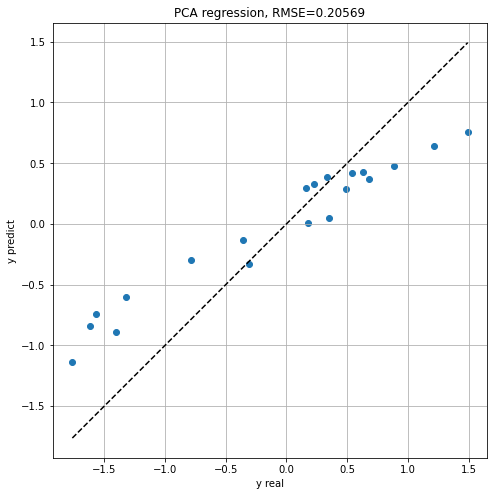

In [9]:
# Aplicar la regresión lineal con datos del PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

linreg = LinearRegression()
linreg.fit(np.array(data_pca[['x1*']]).reshape(80,1), y_train)
ref = np.linspace(min(y_test),max(y_test))
y_predict = linreg.predict(np.array(X_test[['x1']]).reshape(20,1))
fig = plt.figure(figsize=(10,8))
plt.scatter(y_test,y_predict)
plt.plot(ref,ref,'k--')
plt.axis('square')
plt.xlabel('y real'),plt.ylabel('y predict')
plt.title('PCA regression, RMSE=%0.5f'%(mean_squared_error(y_test,y_predict)))
plt.grid()

No se reduce el error cuadrático (fenómeno normal) pero sí reducimos la dimensionalidad de los datos, por lo tanto es menos carga computacional. Con menos información, el regresor sigue dando muy buenos resultados. 

Si son millones de datos y pocas variables, sí conviene hacer el PCA. También conviene en el caso de tener muchas variables.

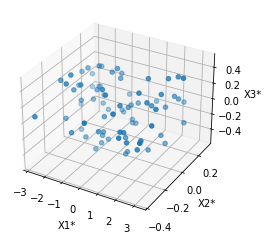

In [10]:
# PLS
from sklearn.cross_decomposition import PLSRegression

X_train, X_test, y_train, y_test = train_test_split(data[['x1','x2','x3']], data.y,
                                                    test_size=0.2, random_state=44)
pls = PLSRegression(n_components=3) # Indicar cuántos componentes usar
pls.fit(X_train[['x1','x2','x3']], y_train)
data_pls = pls.transform(X_train[['x1','x2','x3']])
data_pls = pd.DataFrame(data_pls,columns=['x1*','x2*','x3*'])
data_pls['y'] = y_train

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_pls['x1*'], data_pls['x2*'], data_pls['x3*'])
ax.set_xlabel('X1*')
ax.set_ylabel('X2*')
ax.set_zlabel('X3*')
plt.show()

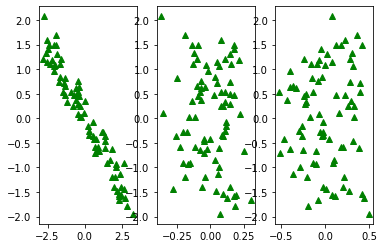

In [11]:
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(1, 3)

plt.figure()
ax = plt.subplot(gs[0, 0]) # row 0, col 0
plt.plot(data_pls['x1*'], y_train, 'g^')

ax = plt.subplot(gs[0, 1]) # row 0, col 1
plt.plot(data_pls['x2*'], y_train, 'g^')

ax = plt.subplot(gs[0, 2]) # row 1, span all columns
plt.plot(data_pls['x3*'], y_train, 'g^')

In [12]:
# Aplicar la regresión lineal para datos PLS
pls = PLSRegression(n_components= 1)
pls.fit(np.array(data_pls[['x1*']]).reshape(80,1), y_train)
y_predict = pls.predict(np.array(X_test[['x1']]).reshape(20,1))


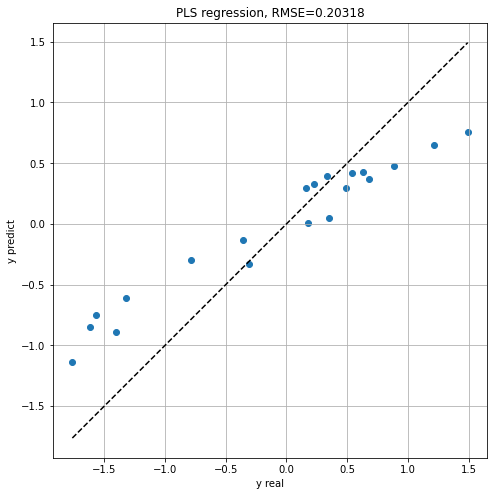

In [13]:
'''
T: x_scores_
U: y_scores_
W: x_weights_
C: y_weights_
P: x_loadings_
Q: y_loadings_
'''

fig = plt.figure(figsize=(10,8))
plt.scatter(y_test,y_predict)
plt.plot(ref,ref,'k--')
plt.axis('square')
plt.xlabel('y real'),plt.ylabel('y predict')
plt.title('PLS regression, RMSE=%0.5f'%(mean_squared_error(y_test,y_predict)))
plt.grid()

Ligeramente es más pequeño el error cuadrático medio para PLS.

In [14]:
# Calcular coeficientes de la regresión lineal mediante PLS
P = pls.x_loadings_
Q = pls.y_loadings_
W = pls.x_weights_
Betas = np.dot(np.dot(P,np.linalg.inv(np.dot(P.T,P))),Q.T)
Beta0 = Q[:,0]-np.dot(P[:,0].T,Betas)